# 第1章 统计学习方法概论

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。


### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

> 参考西瓜书，关于上述符号和公式的理解：
> 
> 1. 在线性回归中，$x_i$表示一个样本(sample)，也是一个向量，向量中有多个特征，比如第`i`个西瓜，有色泽、敲声等特征。
> 2. $y_i$表示某个样本$x_i$的标记(label)，比如“好瓜”和“坏瓜”。
> 3. $(x_i,y_i)$表示拥有了标记信息的样本，称为样例(example)。
> 4. 线性回归中，试图学得$f(x)=wx_i+b$，$f(x)$也即是上述$h(x)$。
> 5. 西瓜书2.3节介绍了`均方误差`，这是回归任务中最常用的性能度量，因此我们可以试图让均方误差最小化，即上述残差平方和最小(未求平均)。求解$w$和$b$使其最小的过程，称为线性回归模型的最小二乘“参数估计”，即分别对$w$和$b$求偏导数，再令偏导数为零，得到$w$和$b$的闭式解。在下面的例子中，为了简化，只求解$w$，即$b=0$。

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

> 看完这个举例，回过头来，总结一下：
> 1. 在这个举例中，我们的目标是通过一些`真实存在的值`（在此使用"目标函数+正态分布随机噪音"模拟）和`M值`不同，试图找的一个`多项式`，使这个`多项式`的曲线既能与目标函数相近，又能尽可能多的经过这些`真实存在的值`。在此期间，构建了残差函数，并且使用最小二乘法来找的某个权值$w$，进而得到这个`多项式`$f=w_0x^8+w_1x^7+...+w_7x^1+w_8x^0$。
> 2. 当M=9时，`多项式`完美经过所有点，但是出现了`过拟合`。

In [15]:
import numpy as np # 导包
import scipy as sp # 导包
from scipy.optimize import leastsq # 导包
import matplotlib.pyplot as plt # 导包
# ipython的一个魔法函数，用于内嵌画图，否则需要plt.show()
%matplotlib inline 

* ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [58]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x) # 调用函数返回上述目标函数y=sin2pix

# 多项式
def fit_func(p, x):
    """ np.poly1d
        args: array(多项式前系数), bool, str
        return: 相应的多项式,幂次递减,比如p=[1],则f=1; p=[1,1],f=1*x+1.
    """
    f = np.poly1d(p) 
    return f(x) # 返回多项式函数f对于自变量x的计算结果

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y # 多项式结果 - 参数y
    return ret # 返回计算结果

ff = fit_func([1, 1], 2)
print(ff)

3


In [60]:
# 十个点
""" np.linspace
    args: start, stop, num(样本数)
    return: 在指定的间隔内返回均匀间隔的数字
"""
x = np.linspace(0, 1, 10) # 此处间隔为1/9=0.111111
x_points = np.linspace(0, 1, 1000) # 间隔为1/999
# 加上正态分布噪音的目标函数的值
y_ = real_func(x) # 输入x数组,输出sin2pix结果数组
""" np.random.normal
    args: loc(均值), scale(标准差), size(返回几个值)
    return: 从正态分布中随机取样本值
"""
y = [np.random.normal(0, 0.1) + y1 for y1 in y_] # 内层循环10次,得到y是一个list,每个item是目标函数值+噪音(随机生成,一般性)

# print(np.random.normal(0, 0.1, 10))
# print(np.random.rand(3,2))
# print((x,y))
# print(leastsq(residuals_func, np.random.rand(2), args=(x, y))[0])

#拟合
def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    """ np.random.rand
        args: 参数个数表示生成几维数组，参数表示每一层的长度
        return: 数据从[0,1]的均匀分布获取
                0个参,返回单个值; 1个参,返回一个一维数组; 2或以上,返回对应维数数组
    """
    p_init = np.random.rand(M + 1) # 生成M+1个随机数列表，随机的意义在于更具一般性
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y)) # 利用最小二乘得到权重w(p_lsq[0]就是w)
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real') # x轴是1000个点,函数是sin(2*pi*x)
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve') # x轴是1000个点,函数是参数为w的多项式
    plt.plot(x, y, 'bo', label='noise') # x轴是10个点,y的值是目标值+噪声
    plt.legend() # 创建图例
    return p_lsq

### M=0

Fitting Parameters: [0.00252437]


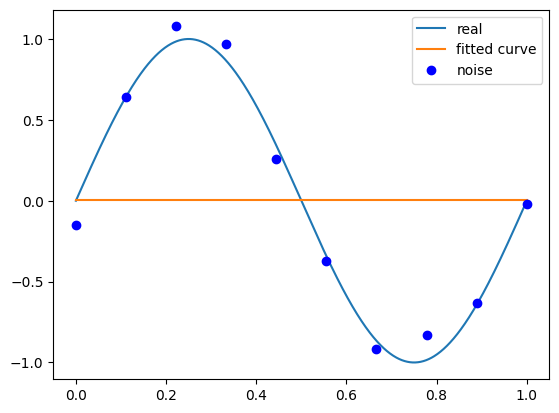

In [61]:
# M=0
p_lsq_0 = fitting(M=0) # M=0时,最小二乘法得到的w=[0.00252437],多项式为f=w=0.00252437,显然M的值不理想.

### M=1

Fitting Parameters: [-1.28575571  0.64540222]


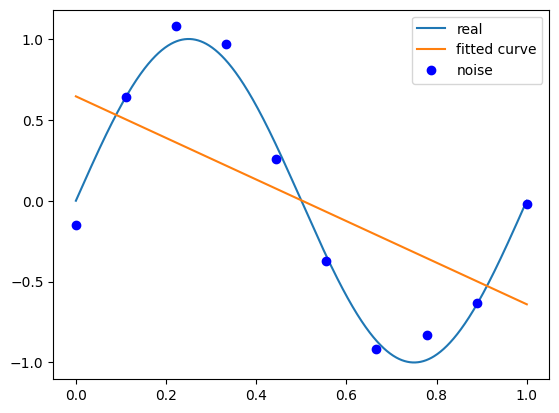

In [62]:
# M=1
p_lsq_1 = fitting(M=1) # M=1时，最小二乘结果是w=[-1.28575571,0.64540222]，多项式为f=-1.28575571*x+0.64540222

### M=3 

Fitting Parameters: [ 22.08921823 -33.41817036  11.57035225  -0.16030059]


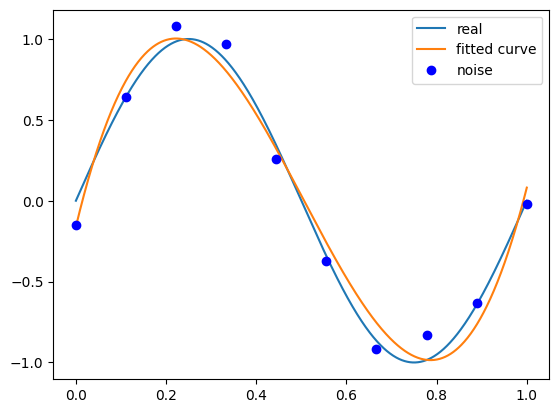

In [63]:
# M=3
p_lsq_3 = fitting(M=3) # M=3时，同理f = w_0*x^3 + w_1*x^2 + w_2*x^1 + w_3*x^0，看起来跟目标函数接近

### M=9

Fitting Parameters: [-1.70872086e+04  7.01364939e+04 -1.18382087e+05  1.06032494e+05
 -5.43222991e+04  1.60701108e+04 -2.65984526e+03  2.12318870e+02
 -7.15931412e-02  3.53804263e-02]


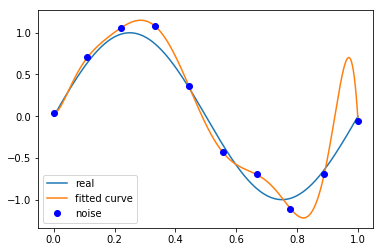

In [12]:
# M=9
p_lsq_9 = fitting(M=9) # M=9时，同理f = ...too long，完美经过所有点，但是问题出现了！太不像目标函数了！

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [9]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [10]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

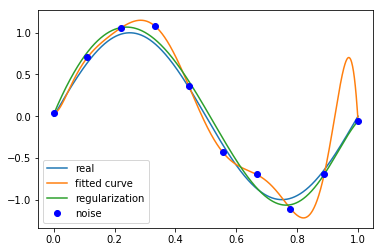

In [11]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

## 第1章统计学习方法概论-习题
**撰写人：**胡锐锋-天国之影-Relph

**github地址：**https://github.com/datawhalechina/statistical-learning-method-solutions-manual

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

**解答：**

伯努利模型的极大似然估计以及贝叶斯估计中的**统计学习方法三要素**如下：  
1. **极大似然估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 最大化似然函数  
**算法：** $\displaystyle \mathop{\arg\min}_{p} L(p)= \mathop{\arg\min}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$
2. **贝叶斯估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 求参数期望  
**算法：**
$$\begin{aligned}  E_\pi\big[p \big| y_1,\cdots,y_n\big]
& = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
& = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
& = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
\end{aligned}$$

**伯努利模型的极大似然估计：**  
定义$P(Y=1)$概率为$p$，可得似然函数为：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$方程两边同时对$p$求导，则：$$\begin{aligned}
0 & = \binom{n}{k}[kp^{k-1}(1-p)^{(n-k)}-(n-k)p^k(1-p)^{(n-k-1)}]\\
& = \binom{n}{k}[p^{(k-1)}(1-p)^{(n-k-1)}(m-kp)]
\end{aligned}$$可解出$p$的值为$p=0,p=1,p=k/n$，显然$\displaystyle P(Y=1)=p=\frac{k}{n}$  

**伯努利模型的贝叶斯估计：**  
定义$P(Y=1)$概率为$p$，$p$在$[0,1]$之间的取值是等概率的，因此先验概率密度函数$\pi(p) = 1$，可得似然函数为： $$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$  
根据似然函数和先验概率密度函数，可以求解$p$的条件概率密度函数：$$\begin{aligned}\pi(p|y_1,\cdots,y_n)&=\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{\int_0^1p^k(1-p)^{(n-k)}dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{B(k+1,n-k+1)}
\end{aligned}$$所以$p$的期望为：$$\begin{aligned}
E_\pi[p|y_1,\cdots,y_n]&={\int}p\pi(p|y_1,\cdots,y_n)dp \\
& = {\int_0^1}\frac{p^{(k+1)}(1-p)^{(n-k)}}{B(k+1,n-k+1)}dp \\
& = \frac{B(k+2,n-k+1)}{B(k+1,n-k+1)}\\
& = \frac{k+1}{n+2}
\end{aligned}$$
$\therefore \displaystyle P(Y=1)=\frac{k+1}{n+2}$

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

**解答：**

假设模型的条件概率分布是$P_{\theta}(Y|X)$，现推导当损失函数是对数损失函数时，极大似然估计等价于经验风险最小化。
极大似然估计的似然函数为：$$L(\theta)=\prod_D P_{\theta}(Y|X)$$两边取对数：$$\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ 
\mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))$$ 
反之，经验风险最小化等价于极大似然估计，亦可通过经验风险最小化推导极大似然估计。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)